# Homework 6 | Problem 1 
The function of interest is 


\begin{equation}
y'' = \frac{1}{(1-x^2)}(2xy' - n(n+1)y)
\end{equation}

We can begin to solve this numberically by making the substitution

\begin{equation}
y' = u.
\end{equation}

Thus,

\begin{equation}
u = y'
\end{equation}
and
\begin{equation}
u' = \frac{1}{(1-x^2)}(2xu - n(n+1)y).
\end{equation}

So, we have to write a function that creates a vector containing those 2 equations

iter  0  shoot point, target 1.066666666725682 1
iter  1  shoot point, target 0.9333333333849596 1
iter  2  shoot point, target 1.0000000000553098 1
iter  3  shoot point, target 0.9666666667201277 1
iter  4  shoot point, target 0.9833333333877328 1
iter  5  shoot point, target 0.9916666667215209 1
iter  6  shoot point, target 0.9958333333884153 1
iter  7  shoot point, target 0.9979166667218614 1
iter  8  shoot point, target 0.9989583333885909 1
iter  9  shoot point, target 0.9994791667219575 1
iter  10  shoot point, target 0.9997395833886364 1
iter  11  shoot point, target 0.9998697917219651 1
iter  12  shoot point, target 0.9999348958886568 1
iter  13  shoot point, target 0.9999674479719792 1
iter  14  shoot point, target 0.9999837240136403 1
iter  15  shoot point, target 0.9999918620344727 1
iter  16  shoot point, target 0.9999959310449014 1
iter  17  shoot point, target 0.9999979655501144 1
iter  18  shoot point, target 0.9999989828027005 1
iter  19  shoot point, target 0.9999994914

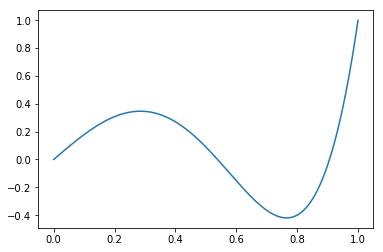

at x = 0.9998999999999062 y =  0.9999999999999998


In [3]:
import numpy as np
import matplotlib.pyplot as plt

n=5
h=0.0001
targety = 1
#y=[0.,1.875]#these will be the initial values y and y' respectively 

def f(x,y):
    f = np.zeros(2)
    f[0] = y[1]
    if x==1:
        f[1] = (2*x*y[1] - n*(n+1)*y[0])
    else:
        f[1] = (1/(1-x*x))*(2*x*y[1] - n*(n+1)*y[0])
    return f
    
def rk4(x, h, y, m):
    k1 = np.zeros(m)
    k2 = np.zeros(m)
    k3 = np.zeros(m)
    k4 = np.zeros(m)
    k1=h*f(x,y)
    k2=h*f(x+0.5*h,y+0.5*k1)
    k3=h*f(x+0.5*h,y+0.5*k2)
    k4=h*f(x+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

xend = 0.9999999999999 
dy0_min=1.5
dy0_max=2.5
maxiter=100
for iter in range(maxiter):
    xp=[]
    yp=[]
    dy=(dy0_min+dy0_max)/2.
    y=[0.,dy]
    x=0
    while(x<xend):
        y = rk4(x,h,y,2)
        xp=np.append(xp,x)
        yp=np.append(yp,y[0])
        x = x+h
    if y[0]<targety:
        dy0_min = dy #finish this line for bisection method
    else:
        dy0_max = dy #finish this line for bisection method
        
    print("iter ",iter, " shoot point, target",y[0],targety)
    
print('\nthe correct initial dy/dx value is', dy)
plt.plot(xp,yp)
plt.show()
print('at x =',xp[-1], 'y = ',yp[-1])

Above, I could not use final x = 1 to iterate, so i had to get as close ass possible before the computational errors became too large. When I arrived at a reasonable answer, namely y'(1) = 1 I recorded the y'(0) value and used it in a direct method of solving the ODE to check that it really yielded the correct answer. Below I check that the answer is correct to as close to machine error as possible. The function that defines the differential equation is modified to not blow up when x approaches 1. This was found through trial and error and has no theoretical foundation other than to make the program not explode. 

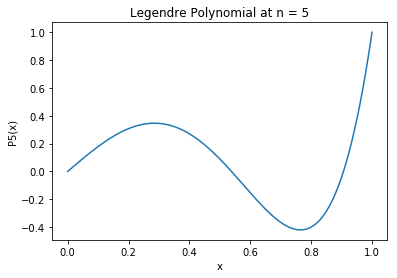

0.9999999999999062 1.0000000000555482
0.0 0.00018749999124999996


In [2]:
import numpy as np
import matplotlib.pyplot as plt

n=5
h=0.0001
targety = 1
y=[0.,1.875]#these will be the initial values y and y' respectively 

def f(x,y):
    f = np.zeros(2)
    f[0] = y[1]
    if x==1:
        f[1] = (2*x*y[1] - n*(n+1)*y[0])
    else:
        f[1] = (1/(1-x*x))*(2*x*y[1] - n*(n+1)*y[0])
    return f
    
def rk4(x, h, y, m):
    k1 = np.zeros(m)
    k2 = np.zeros(m)
    k3 = np.zeros(m)
    k4 = np.zeros(m)
    k1=h*f(x,y)
    k2=h*f(x+0.5*h,y+0.5*k1)
    k3=h*f(x+0.5*h,y+0.5*k2)
    k4=h*f(x+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

h = 0.0001
x=0
xend=1

xp1=[]
yp1=[]
while(x<xend):
    if((x+h)>xend):
        h=xend-x
    y = rk4(x,h,y,2)
    xp1=np.append(xp1,x)
    yp1=np.append(yp1,y[0])
    x = x+h

plt.plot(xp1,yp1)
plt.title('Legendre Polynomial at n = 5')
plt.xlabel('x')
plt.ylabel('P5(x)')
plt.show()
print(xp1[-1],yp1[-1])
print(xp1[0],yp1[0])